# Bernoulli Distribution

The Bernoulli distribution is a discrete probability distribution that models a random experiment with two possible outcomes,  
often labeled as "success" and "failure." It is named after Jacob Bernoulli, a Swiss mathematician.  
The distribution is characterized by a single parameter, $(p)$, which represents the probability of success.

## Probability Mass Function (PMF)

The probability mass function of a Bernoulli distribution is defined as:

$ [ P(X=k) = \begin{cases} p & \text{if } k=1 \\ q=(1-p) & \text{if } k=0 \end{cases} ] $

Here:
- $( P(X=k) )$ is the probability that the random variable $( X )$ takes the value $( k )$.
- $( p )$ is the probability of success (e.g., getting a "head" in a coin toss).
- $( q )$ is the probability of failure $( 1 - p )$.

## Mean and Variance

The mean $( \mu )$ and variance $( \sigma^2 )$ of a Bernoulli distribution are given by:

$[ \mu = p ]$

$[ \sigma^2 = pq = p(1-p) ]$

where $( q )$ is the probability of failure.

## Cumulative Distribution Function (CDF)

The cumulative distribution function (CDF) of a Bernoulli distribution is given by:

$[ F(x) = \begin{cases} 0 & \text{if } x < 0 \\ 1-p & \text{if } 0 \leq x < 1 \\ 1 & \text{if } x \geq 1 \end{cases} ]$

It represents the probability that the random variable is less than or equal to $( x )$.

The Bernoulli distribution is fundamental in probability theory and serves as the building block for other distributions like the binomial distribution.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

{'Tails': 0.5, 'Heads': 0.5}


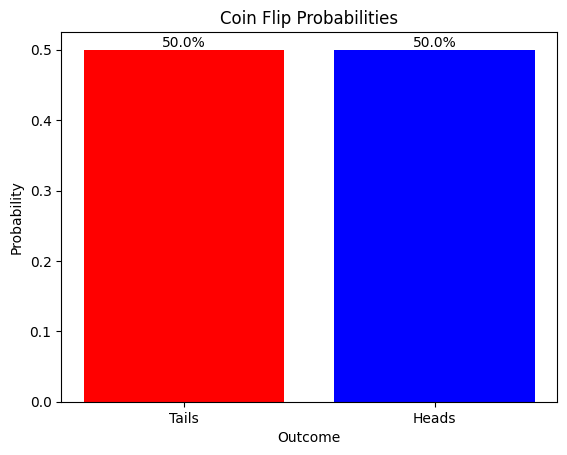

In [2]:
# Define our likelihood of 'success' - aka Heads
p_success = .5

# Now - lets use the stats library to get the probabilities
p_tails = stats.bernoulli.pmf(k=0, p=p_success) # Probability of 'failure' (0)
p_heads = stats.bernoulli.pmf(k=1, p=p_success) # Probability of 'success' (1)


# Create a dict for visualization:
coin_flip = {
    'Tails' : round(p_tails, 2),
    'Heads' : round(p_heads, 2)
}

print(coin_flip)
fig, ax = plt.subplots()
bars = ax.bar(coin_flip.keys(), coin_flip.values(), color=['red', 'blue'])

# Add percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval * 100:.1f}%", ha='center', va='bottom')

ax.set_title('Coin Flip Probabilities')
ax.set_ylabel('Probability')
ax.set_xlabel('Outcome')
ax.set_xticks(range(len(coin_flip)))
ax.set_xticklabels(coin_flip.keys())

plt.show()

Number of successes: 300
Number of failures: 700
probability of success: 30.0%
probability of failure: 70.0%


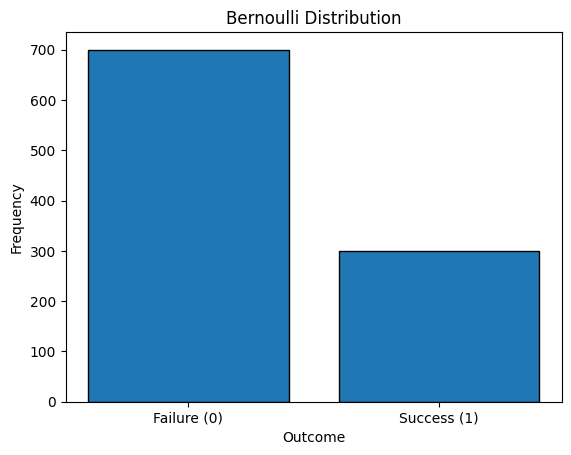

In [3]:
# Probability of success
prob_success = 0.3

# Number of samples
num_samples = 1000

# Generate random samples
samples = np.random.choice([0, 1], size=num_samples, p=[1 - prob_success, prob_success])

# Calculate the frequency of successes and failures
frequency_success = np.sum(samples == 1)
frequency_failure = np.sum(samples == 0)

# Calculate probabilities
probability_success = frequency_success / num_samples
probability_failure = frequency_failure / num_samples

print(f'Number of successes: {frequency_success}')
print(f'Number of failures: {frequency_failure}')

print(f'probability of success: {round(probability_success * 100, 2)}%')
print(f'probability of failure: {round(probability_failure * 100, 2)}%')

# Plot histogram
plt.hist(samples, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid', rwidth=0.8)
plt.title('Bernoulli Distribution')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.show()


### Probability Mass Function (PMF) for a fair coin flip

[0.5 0.5]


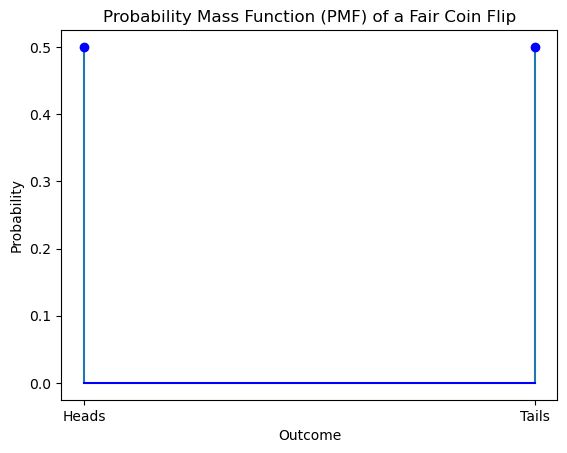

In [4]:
# Define the possible outcomes of the coin flip
possible_outcomes = ["Heads", "Tails"]

# Probability Mass Function (PMF) for a fair coin flip
pmf_values = np.ones(len(possible_outcomes)) / len(possible_outcomes)
print(pmf_values)

# Plotting the PMF
plt.stem(possible_outcomes, pmf_values, basefmt="b", markerfmt="bo")
plt.title("Probability Mass Function (PMF) of a Fair Coin Flip")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.show()

Probability of getting heads: 0.490
Probability of getting tails: 0.510


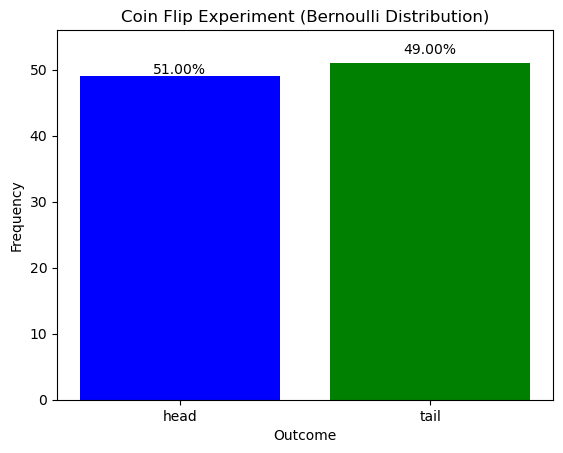

In [5]:
outcomes = ["head", "tail"]
num_flips = 100

sample_space = np.random.choice(outcomes, size=num_flips)
unique_flips, counts_flips = np.unique(sample_space, return_counts=True)

# Define the probability of getting heads (success)
p_heads = counts_flips[outcomes.index("head")] / num_flips
p_tails = counts_flips[outcomes.index("tail")] / num_flips

probability_heads = stats.bernoulli.pmf(k=1, p=p_heads)  # Probability of 'success' (1)
probability_tails = stats.bernoulli.pmf(k=0, p=p_heads)  # Probability of 'failure' (0)

print(f"Probability of getting heads: {probability_heads:.3f}")
print(f"Probability of getting tails: {probability_tails:.3f}")

# Plotting the results
plt.bar(unique_flips, counts_flips, color=["blue", "green"])
plt.title(f"Coin Flip Experiment (Bernoulli Distribution)")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.xticks(outcomes)

plt.text(
    0,
    counts_flips[0] + 1,
    f"{probability_tails:.2%}",
    ha="center",
    va="center",
    color="black",
)
plt.text(
    1,
    counts_flips[1] + 1,
    f"{probability_heads:.2%}",
    ha="center",
    va="bottom",
    color="black",
)
plt.ylim(top=max(counts_flips) + 5)
plt.show()

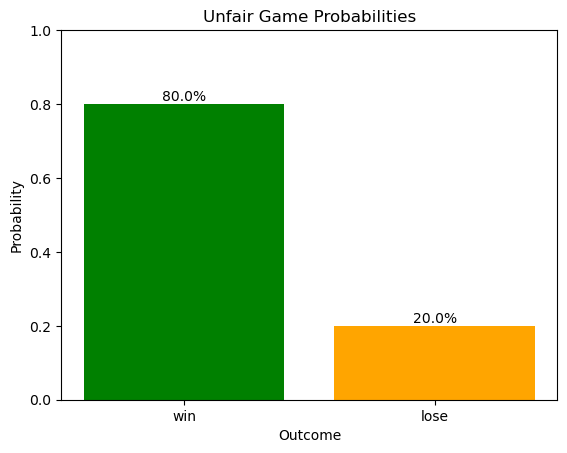

In [6]:
prob_of_success = 0.8
rv = stats.bernoulli(prob_of_success)
unfair_game = {"win": rv.pmf(k=1), "lose": rv.pmf(k=0)}

rounded_unfair_game = {key: round(value, 3) for key, value in unfair_game.items()}

fig, ax = plt.subplots()
bars = ax.bar(rounded_unfair_game.keys(), rounded_unfair_game.values(), color=['green', 'orange'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval * 100:.1f}%", ha='center', va='bottom')

ax.set_title("Unfair Game Probabilities")
ax.set_ylabel("Probability")
ax.set_ylim(0, 1)
ax.set_xlabel("Outcome")
plt.show()


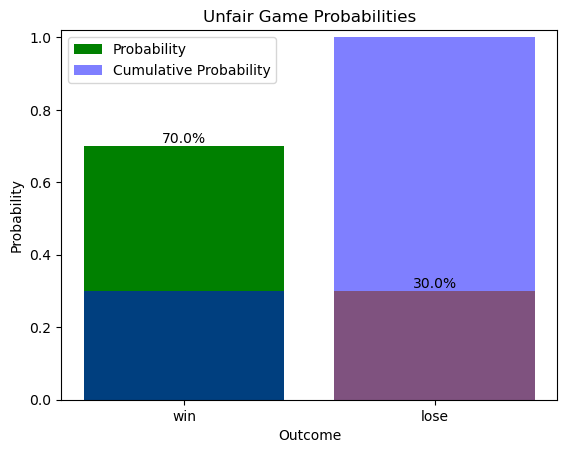

In [7]:
prob_of_success = 0.7
rv = stats.bernoulli(prob_of_success)
unfair_game = {"win": rv.pmf(k=1), "lose": rv.pmf(k=0)}

rounded_unfair_game = {key: round(value, 3) for key, value in unfair_game.items()}
percentages = {key: value * 100 for key, value in rounded_unfair_game.items()}


fig, ax = plt.subplots()
bars = ax.bar(rounded_unfair_game.keys(), rounded_unfair_game.values(), color=['green', 'orange'], label='Probability')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval , f"{yval * 100:.1f}%", ha='center', va='bottom')


cumulative_probs = [rv.cdf(0), rv.cdf(1)]
ax.bar(rounded_unfair_game.keys(), height=cumulative_probs, color='blue', alpha=0.5, label='Cumulative Probability')

ax.set_title("Unfair Game Probabilities")
ax.set_ylabel("Probability")
ax.set_ylim(0, 1.02)
ax.set_xlabel("Outcome")
ax.legend()
plt.show()
